In [1]:
import os
import numpy as np
#For Image pre-Processing, processing and building model
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
#for Plotting Model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

Using TensorFlow backend.


In [9]:
img_width, img_height = 384,256
#rescaling pixel values from [0,255] to [0,1] interval
datagen = ImageDataGenerator(rescale = 1./255)
#retrieves images and their classes for test sets
validation_data_dir = 'data/test/new'
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='binary')

Found 24 images belonging to 2 classes.


# The following Cell Defines the Stucture of Convolutinal Network

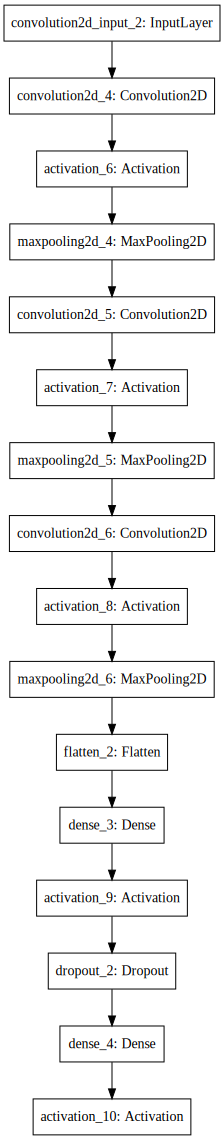

In [10]:
#This CellDefines the structure of the model
#Define Model Type followed by layers
model = Sequential()
model.add(Convolution2D(32,3,3,input_shape = (img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,3,3,input_shape = (img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,3,3,input_shape = (img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [11]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_4 (Convolution2D)  (None, 382, 254, 32)  896         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
activation_6 (Activation)        (None, 382, 254, 32)  0           convolution2d_4[0][0]            
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 191, 127, 32)  0           activation_6[0][0]               
____________________________________________________________________________________________________
convolution2d_5 (Convolution2D)  (None, 189, 125, 32)  9248        maxpooling2d_4[0][0]             
___________________________________________________________________________________________

In [12]:
model.get_weights()

[array([[[[  1.17220417e-01,  -1.58450827e-02,   1.10308185e-01,
            -9.26673710e-02,  -1.28362834e-01,  -1.34925544e-02,
             7.07619339e-02,   1.17696658e-01,  -1.02392972e-01,
             3.26188803e-02,   1.57624483e-03,  -6.61431402e-02,
            -3.15017626e-02,  -1.20044440e-01,   3.83125395e-02,
            -1.32627860e-01,  -1.26396999e-01,   8.21519196e-02,
             3.41900587e-02,  -1.20524198e-01,   1.04931056e-01,
            -7.02130795e-03,  -9.77286100e-02,  -2.49457210e-02,
            -1.22874424e-01,  -6.90401495e-02,  -7.89756849e-02,
             4.57750410e-02,  -9.40519124e-02,  -3.36003006e-02,
             1.81394815e-03,   3.40950638e-02],
          [ -8.87610018e-03,  -1.02366090e-01,   6.28295541e-03,
             9.96004939e-02,  -1.13785535e-01,   1.36661544e-01,
             7.61853456e-02,   9.01363790e-03,  -1.21401504e-01,
            -6.17082492e-02,  -6.62403405e-02,  -8.59008804e-02,
            -1.14420861e-01,   1.18412331e

In [13]:
#compiles the model
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [14]:
nb_validation_samples = 24

In [15]:
#Loads a pre-learned Model
model.load_weights('models/basic_cnn_15epochs_acc_1.h5')

In [16]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.65644508600234985, 0.70833331346511841]

In [17]:
model.get_weights()

[array([[[[  1.02455854e-01,   5.54410592e-02,   6.39479747e-03,
            -5.55022135e-02,   3.77718471e-02,  -1.39500812e-01,
             1.12257898e-01,   6.24347329e-02,  -2.97954283e-03,
            -1.06059872e-02,   7.48257041e-02,   8.43263138e-03,
             1.31267324e-01,   1.42700210e-01,  -2.55407467e-02,
             5.27998880e-02,  -1.42209500e-03,   5.29781431e-02,
             3.53084505e-02,   3.44505608e-02,  -2.59275082e-02,
            -7.53219947e-02,   7.91581571e-02,  -1.73547845e-02,
            -4.64562699e-02,   9.92058590e-02,  -8.34282562e-02,
            -2.12254580e-02,  -5.67711145e-02,  -1.15294367e-01,
             1.16331227e-01,   5.44234887e-02],
          [  9.97366011e-03,  -1.23392284e-01,   3.00389193e-02,
             7.12041408e-02,   2.24815775e-03,   1.23505131e-03,
            -1.11889482e-01,   2.51218881e-02,   7.82401189e-02,
            -2.88102520e-03,  -3.28093208e-02,   5.73758781e-02,
            -1.34835560e-02,  -1.22481227e